In [4]:
import osmnx as ox

# Построение графа по названию города

In [30]:
g = ox.graph_from_place("Санкт-Петербург")

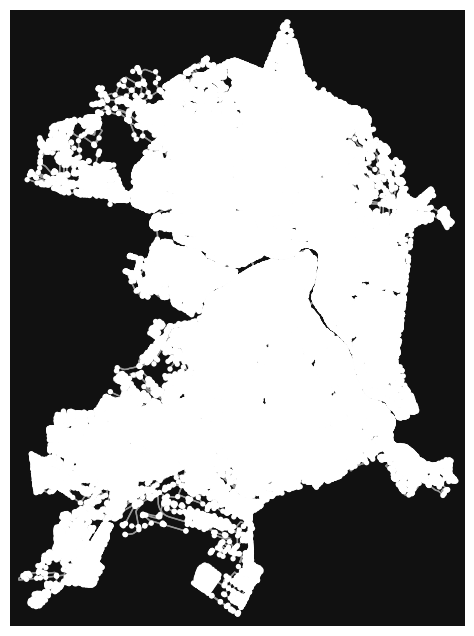

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [31]:
ox.plot_graph(g)

Видна проблема - Санкт-Петербург получился обрезанным. Такая проблема возникает из-за того, что в OSM существует 2 сущности с названием Санкт-Петербург https://www.openstreetmap.org/search?query=Санкт-Петербург. Такое происходит только для Москвы и Санкт-Петербурга, так как они одновременно являются городами и областями. Их возможно следует обрабатывать отдельным образом.

In [32]:
ox.geocode_to_gdf('Санкт-Петербург', which_result=1)

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"MULTIPOLYGON (((29.42576 60.19074, 29.42719 60...",60.244837,59.633783,30.759493,29.425758,181679261,relation,337422,59.960674,30.158655,boundary,administrative,8,0.723213,state,Saint Petersburg,"Saint Petersburg, Northwestern Federal Distric..."


In [7]:
ox.geocode_to_gdf('Санкт-Петербург', which_result=2)

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((30.04334 59.76418, 30.04382 59.76239...",60.090737,59.744148,30.567166,30.043343,181978986,relation,421007,59.938732,30.316229,place,city,16,0.723213,city,Saint Petersburg,"Saint Petersburg, Northwestern Federal Distric..."


# Построение графа общественного транспорта

In [2]:
from osmnx.settings import bidirectional_network_types

In [3]:
ox.settings.bidirectional_network_types

['walk']